# Full Data Cleaning

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [189]:
df = pd.read_csv('../data/processed/1.1_merged_data.csv', sep=';')
df.head(3)

,STATUS,ORBITAL_PERIOD_DAYS,TRANSIT_DURATION_HOURS,TRANSIT_DEPTH_PPM,PLANET_RADIUS_REARTH,PLANET_INSOLATION_EFLUX,PLANET_EQ_TEMP_K,STELLAR_TEFF_K,STELLAR_LOGG_CMS2,STELLAR_RADIUS_RSUN
0,CONFIRMED,9.488036,2.9575,615.8,2.26,93.59,793.0,5455.0,4.467,0.927
1,CONFIRMED,54.418383,4.5070,874.8,2.83,9.11,443.0,5455.0,4.467,0.927
2,CANDIDATE,19.899140,1.7822,10829.0,14.60,39.30,638.0,5853.0,4.544,0.868


In [190]:
df.shape

(17267, 10)

In [191]:
target = df['STATUS']
features = df.drop('STATUS', axis=1)

In [192]:
features.duplicated().sum()

np.int64(0)

In [193]:
df.isna().sum()

STATUS                        0
ORBITAL_PERIOD_DAYS         107
TRANSIT_DURATION_HOURS        0
TRANSIT_DEPTH_PPM           363
PLANET_RADIUS_REARTH        869
PLANET_INSOLATION_EFLUX     497
PLANET_EQ_TEMP_K            674
STELLAR_TEFF_K              524
STELLAR_LOGG_CMS2          1219
STELLAR_RADIUS_RSUN         870
dtype: int64

In [194]:
df.dtypes

STATUS                      object
ORBITAL_PERIOD_DAYS        float64
TRANSIT_DURATION_HOURS     float64
TRANSIT_DEPTH_PPM          float64
PLANET_RADIUS_REARTH       float64
PLANET_INSOLATION_EFLUX    float64
PLANET_EQ_TEMP_K           float64
STELLAR_TEFF_K             float64
STELLAR_LOGG_CMS2          float64
STELLAR_RADIUS_RSUN        float64
dtype: object

In [195]:
df.describe()

,ORBITAL_PERIOD_DAYS,TRANSIT_DURATION_HOURS,TRANSIT_DEPTH_PPM,PLANET_RADIUS_REARTH,PLANET_INSOLATION_EFLUX,PLANET_EQ_TEMP_K,STELLAR_TEFF_K,STELLAR_LOGG_CMS2,STELLAR_RADIUS_RSUN
count,17160.000000,17267.000000,1.690400e+04,16398.000000,1.677000e+04,16593.000000,16743.000000,16048.000000,16397.000000
mean,50.027673,4.478497,1.671233e+04,62.265485,5.277332e+03,1173.282929,5744.957882,4.308071,1.586097
std,998.969196,5.136641,6.229679e+04,2305.774959,1.184486e+05,791.399741,1157.205286,0.383217,4.712983
min,0.152076,0.052000,0.000000e+00,0.080000,0.000000e+00,25.000000,2661.000000,0.047000,0.109000
25%,2.573540,2.122698,3.210000e+02,1.930000,3.928050e+01,650.000000,5270.000000,4.167022,0.848000
50%,5.652540,3.214000,1.238500e+03,5.102565,2.345184e+02,1022.000000,5780.000000,4.400000,1.070000
75%,17.637781,4.892500,7.630000e+03,14.123102,1.044312e+03,1507.000000,6178.000000,4.530000,1.529000
max,129995.778400,138.540000,1.541400e+06,200346.000000,1.094755e+07,14667.000000,50000.000000,5.960650,229.908000


In [196]:
for col in df.columns[1:]:
    df[col].fillna(df[col].mean(), inplace=True)

df.isna().sum()

C:\Users\phrug\AppData\Local\Temp\ipykernel_31416\1142792855.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


STATUS                     0
ORBITAL_PERIOD_DAYS        0
TRANSIT_DURATION_HOURS     0
TRANSIT_DEPTH_PPM          0
PLANET_RADIUS_REARTH       0
PLANET_INSOLATION_EFLUX    0
PLANET_EQ_TEMP_K           0
STELLAR_TEFF_K             0
STELLAR_LOGG_CMS2          0
STELLAR_RADIUS_RSUN        0
dtype: int64

## Status

In [197]:
df['STATUS'].value_counts()

STATUS
FALSE POSITIVE    4839
PC                4679
CONFIRMED         2746
CANDIDATE         1979
FP                1197
CP                 684
KP                 583
APC                462
FA                  98
Name: count, dtype: int64

- APC = Ambiguous  Planetary Candidate
- CP = Confirmed Planet
- FA = False Alarm
- FP = False Positive
- KP = Known Planet
- PC = Planetary Candidate

In [198]:
df['STATUS'] = df['STATUS'].replace(['FALSE POSITIVE', 'FP', 'FA'], 0)
df['STATUS'] = df['STATUS'].replace(['CONFIRMED', 'CP', 'KP'], 1)
df['STATUS'] = df['STATUS'].replace(['CANDIDATE', 'APC', 'PC'], 1)
df['STATUS'].value_counts()

C:\Users\phrug\AppData\Local\Temp\ipykernel_31416\1966442550.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['STATUS'] = df['STATUS'].replace(['CANDIDATE', 'APC', 'PC'], 1)


STATUS
1    11133
0     6134
Name: count, dtype: int64

## ORBITAL_PERIOD_DAYS

- Real info: 
    - Orbital periods range from ~0.2 days (ultrashort planets) to >10,000 days (years)

In [199]:
df['ORBITAL_PERIOD_DAYS'].describe()

count     17267.000000
mean         50.027673
std         995.869004
min           0.152076
25%           2.594037
50%           5.712192
75%          18.008233
max      129995.778400
Name: ORBITAL_PERIOD_DAYS, dtype: float64

<Axes: ylabel='ORBITAL_PERIOD_DAYS'>

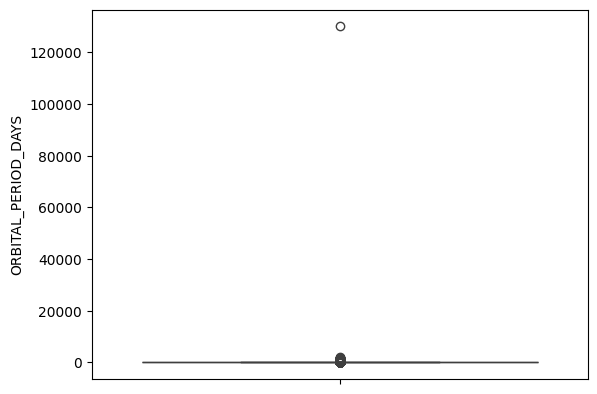

In [200]:
sns.boxplot(df['ORBITAL_PERIOD_DAYS'])

In [201]:
df.shape

(17267, 10)

In [202]:
df = df[df['ORBITAL_PERIOD_DAYS'] < 10000]

<Axes: ylabel='ORBITAL_PERIOD_DAYS'>

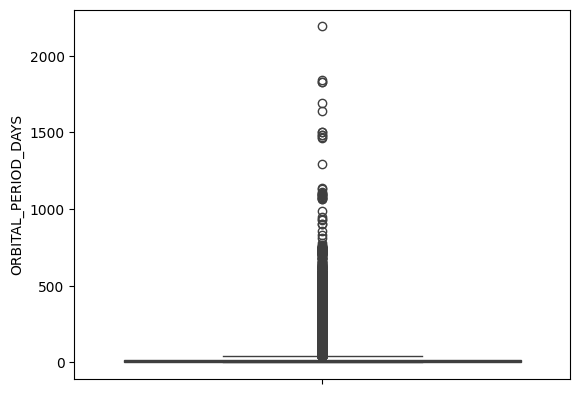

In [203]:
sns.boxplot(df['ORBITAL_PERIOD_DAYS'])

<Axes: >

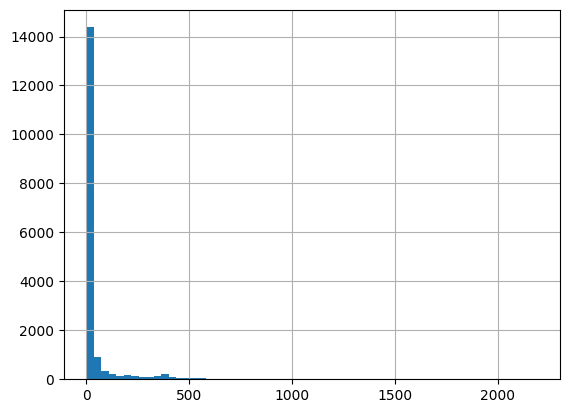

In [204]:
df['ORBITAL_PERIOD_DAYS'].hist(bins=60)

In [205]:
df['ORBITAL_PERIOD_DAYS'].describe()

count    17266.000000
mean        42.501567
std        117.105496
min          0.152076
25%          2.593957
50%          5.710800
75%         18.004473
max       2190.701035
Name: ORBITAL_PERIOD_DAYS, dtype: float64

## TRANSIT_DURATION_HOURS

- Real info:
    - Transit duration range from ~0,5 h to 20 h, typically 1 to 6 hours

In [206]:
df['TRANSIT_DURATION_HOURS'].describe()

count    17266.000000
mean         4.478212
std          5.136652
min          0.052000
25%          2.122597
50%          3.214000
75%          4.891000
max        138.540000
Name: TRANSIT_DURATION_HOURS, dtype: float64

<Axes: ylabel='TRANSIT_DURATION_HOURS'>

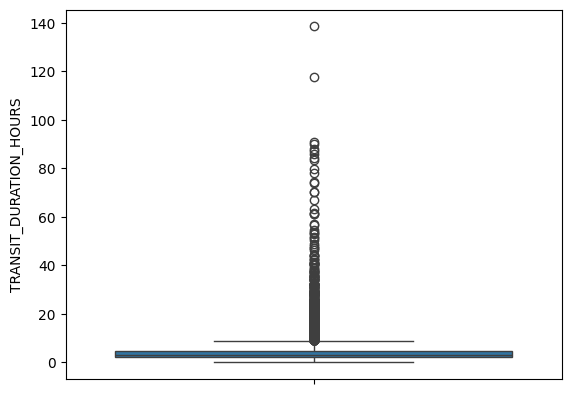

In [207]:
sns.boxplot(df['TRANSIT_DURATION_HOURS'])

In [208]:
df = df[df['TRANSIT_DURATION_HOURS'] < 100]

<Axes: >

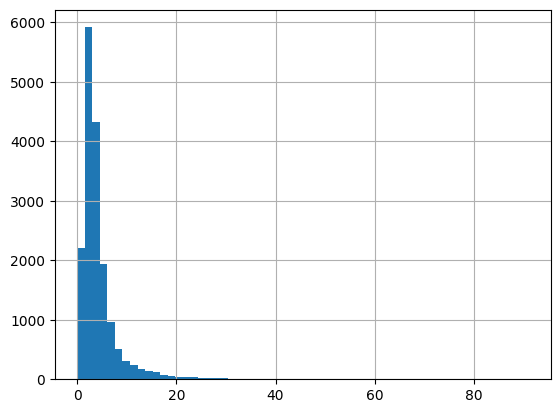

In [209]:
df['TRANSIT_DURATION_HOURS'].hist(bins=60)

In [210]:
df['TRANSIT_DURATION_HOURS'].describe()

count    17264.000000
mean         4.463898
std          4.960517
min          0.052000
25%          2.122372
50%          3.214000
75%          4.891000
max         90.950000
Name: TRANSIT_DURATION_HOURS, dtype: float64

## TRANSIT_DEPTH_PPM
- Real info:
    - Transit depth range from 10 ppm to 100.000 ppm, typically 1000 to 3000

In [211]:
df['TRANSIT_DEPTH_PPM'].describe()

count    1.726400e+04
mean     1.671483e+04
std      6.164351e+04
min      0.000000e+00
25%      3.309750e+02
50%      1.324059e+03
75%      8.362500e+03
max      1.541400e+06
Name: TRANSIT_DEPTH_PPM, dtype: float64

<Axes: ylabel='TRANSIT_DEPTH_PPM'>

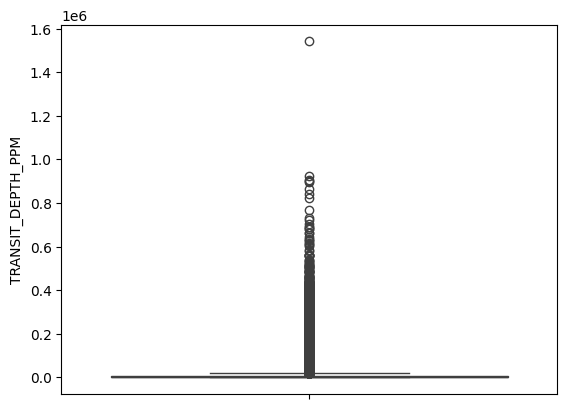

In [212]:
sns.boxplot(df['TRANSIT_DEPTH_PPM'])

In [213]:
df = df[df['TRANSIT_DEPTH_PPM'] < 1.0e6]

<Axes: ylabel='TRANSIT_DEPTH_PPM'>

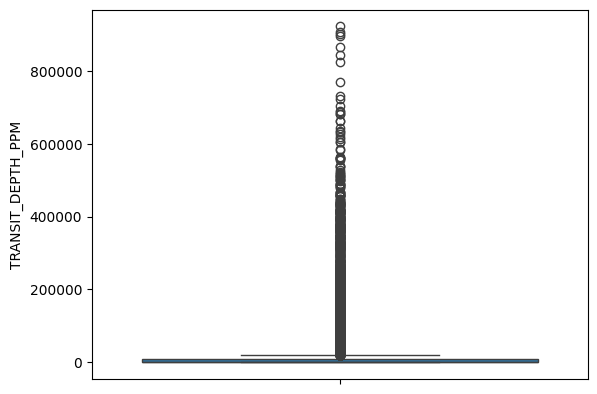

In [214]:
sns.boxplot(df['TRANSIT_DEPTH_PPM'])

<Axes: >

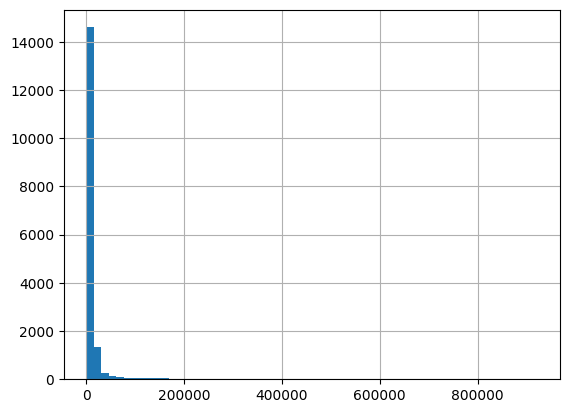

In [215]:
df['TRANSIT_DEPTH_PPM'].hist(bins=60)

In [216]:
df.shape

(17263, 10)

## PLANET_RADIUS_REARTH
- Real info:
    - Planet radius range from ~0,3 to 20 R⊕, most of knwon exoplanets range from 1 to 4R⊕
        - Ex: Earth - 1 R⊕ -> Júpiter ≈ 11.2 R⊕
    - Largest known planet: ~20–22 R⊕

In [217]:
df['PLANET_RADIUS_REARTH'].describe()

count     17263.000000
mean         62.250509
std        2247.260222
min           0.080000
25%           2.020000
50%           6.240000
75%          15.705150
max      200346.000000
Name: PLANET_RADIUS_REARTH, dtype: float64

<Axes: ylabel='PLANET_RADIUS_REARTH'>

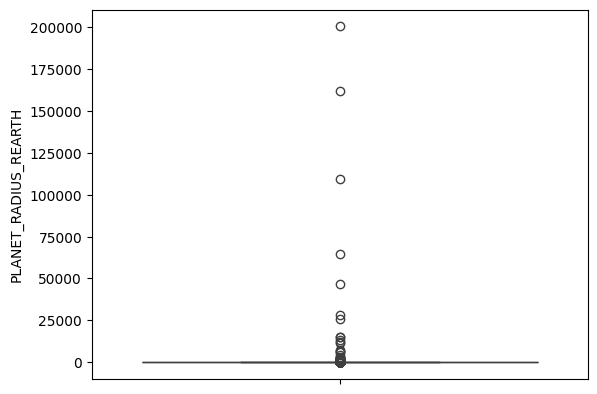

In [218]:
sns.boxplot(df['PLANET_RADIUS_REARTH'])

In [219]:
df = df[df['PLANET_RADIUS_REARTH'] < 30]

In [220]:
df.shape

(14701, 10)

<Axes: ylabel='PLANET_RADIUS_REARTH'>

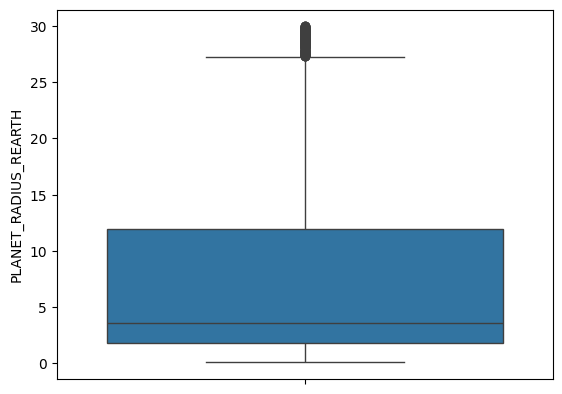

In [221]:
sns.boxplot(df['PLANET_RADIUS_REARTH'])

<Axes: >

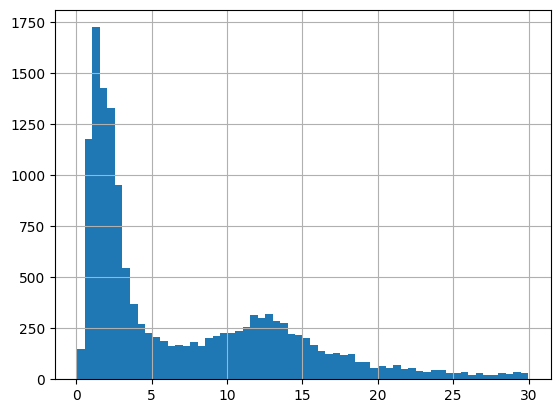

In [222]:
df['PLANET_RADIUS_REARTH'].hist(bins=60)

## PLANET_INSOLATION_EFLUX
- Real info:
    - Planet insolation range from ~0 to 1000 flux, typically 100 to 500
    - Mercury receives about 100 times more sunlight compared to Earth.

In [223]:
df['PLANET_INSOLATION_EFLUX'].describe()

count     14701.000000
mean       2255.822236
std       15212.006029
min           0.000342
25%          34.950000
50%         208.610000
75%         911.280000
max      781981.980000
Name: PLANET_INSOLATION_EFLUX, dtype: float64

<Axes: ylabel='PLANET_INSOLATION_EFLUX'>

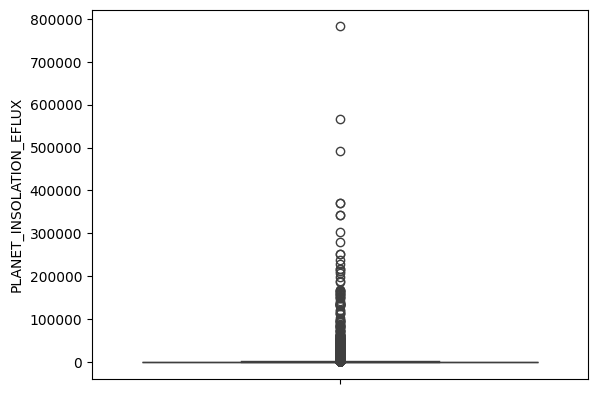

In [224]:
sns.boxplot(df['PLANET_INSOLATION_EFLUX'])

In [225]:
df = df[(df["PLANET_INSOLATION_EFLUX"] > 0) & (df["PLANET_INSOLATION_EFLUX"] < 10000)]

<Axes: ylabel='PLANET_INSOLATION_EFLUX'>

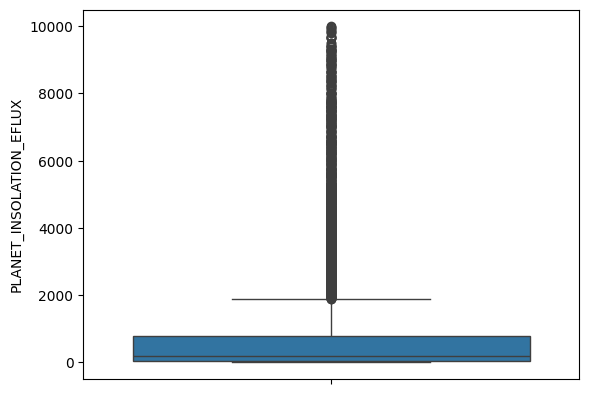

In [226]:
sns.boxplot(df['PLANET_INSOLATION_EFLUX'])

<Axes: >

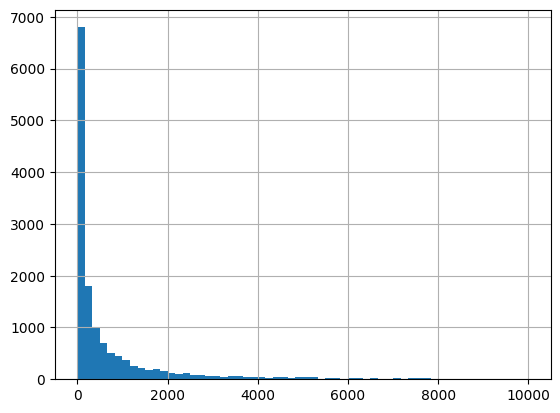

In [227]:
df['PLANET_INSOLATION_EFLUX'].hist(bins=60)

In [228]:
df.shape

(14194, 10)

## PLANET_EQ_TEMP_K
- Real info: 
    - Planet temperature range from 20 to 3000 Kelvin, typically 500 to 1100 Kelvin
        - 50 K – 300 K: Cold planets, like distant planets and frozen moons
        - 200 K – 350 K: Theoretical habitable zone (planets with a chance of liquid water)
        - 350 K – 800 K: Hot planets, like Venus or hot Neptune
        - 800 K – 1500 K: Hot Jupiters and planets close to the star
        - 1500 K – 3000 K: Ultrahot planets (often nearby gas giants)
        - More then 3000 K: Very rare for planets; usually stars or errors

In [229]:
df['PLANET_EQ_TEMP_K'].describe()

count    14194.000000
mean      1043.082500
std        541.641645
min         37.000000
25%        623.035765
50%        976.000000
75%       1390.750000
max       2893.848124
Name: PLANET_EQ_TEMP_K, dtype: float64

<Axes: ylabel='PLANET_EQ_TEMP_K'>

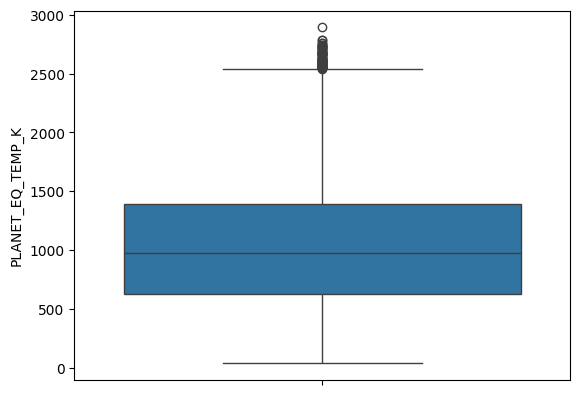

In [230]:
sns.boxplot(df['PLANET_EQ_TEMP_K'])

<Axes: >

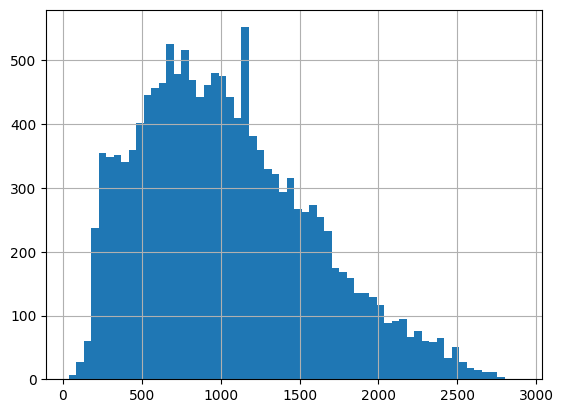

In [231]:
df['PLANET_EQ_TEMP_K'].hist(bins=60)

## STELLAR_TEFF_K
- Real info:
    - Stellar Effective Temperature range from 2000 to 60000 Kelvin, typically 4000 to 7000 Kelvin
    - Sun has ~5200 – 6000 K
    - Highest "realistic" effective temperature of a star with confirmed planets: around 20,000 K (some special cases).
    - Hotter stars exist, but planets around them are rare and difficult to detect.
    - Temperatures above 50,000 K are extremely rare, and virtually no planets have been detected.


In [232]:
df['STELLAR_TEFF_K'].describe()

count    14194.000000
mean      5659.267294
std       1061.891716
min       2661.000000
25%       5242.000000
50%       5747.000000
75%       6122.000000
max      50000.000000
Name: STELLAR_TEFF_K, dtype: float64

<Axes: ylabel='STELLAR_TEFF_K'>

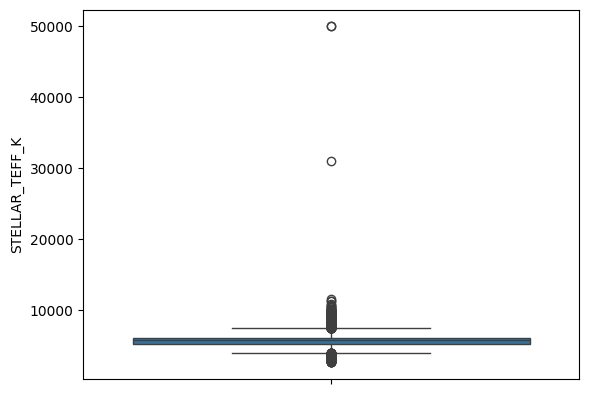

In [233]:
sns.boxplot(df['STELLAR_TEFF_K'])

In [234]:
df = df[df['STELLAR_TEFF_K'] < 20000]

<Axes: ylabel='STELLAR_TEFF_K'>

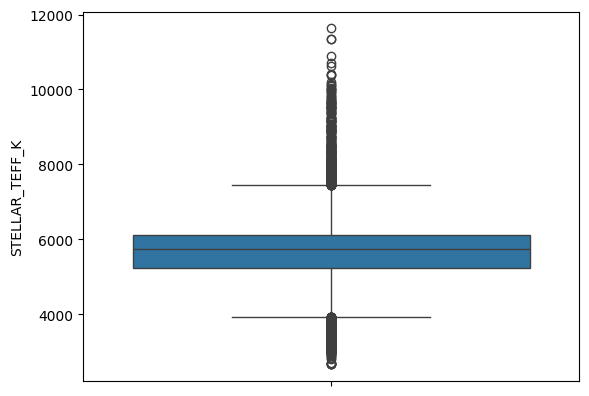

In [235]:
sns.boxplot(df['STELLAR_TEFF_K'])

<Axes: >

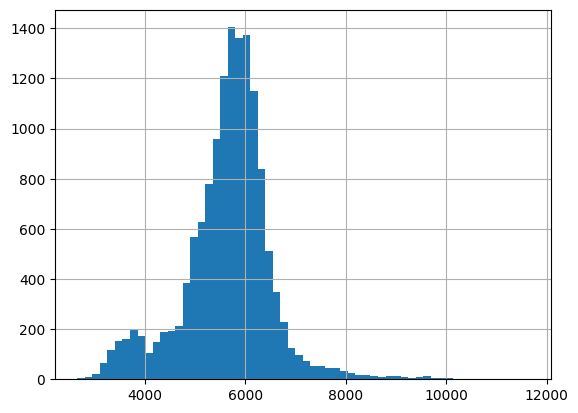

In [236]:
df['STELLAR_TEFF_K'].hist(bins=60)

In [237]:
df.shape

(14191, 10)

## STELLAR_LOGG_CMS2
- Real info: 
    - Stellar Surface Gravity range from 0 to ~5 log10(cm/s**2), typically 3.5 to 5.0
        - Red Dwarfs (M-type stars): 4.7 – 5.2
        - Sun-like Stars (G-type stars): 4.2 – 4.6
        - Subgiants: 3.5 – 4.0
        - Giants: 2.0 – 3.5
        - Supergiants: 0.0 – 2.0
        - Puffed-up Post-Supernova Stars: < 0.5 (extremely rare)

In [238]:
df['STELLAR_LOGG_CMS2'].describe()

count    14191.000000
mean         4.351027
std          0.295196
min          0.100000
25%          4.218015
50%          4.410000
75%          4.538000
max          5.960650
Name: STELLAR_LOGG_CMS2, dtype: float64

<Axes: ylabel='STELLAR_LOGG_CMS2'>

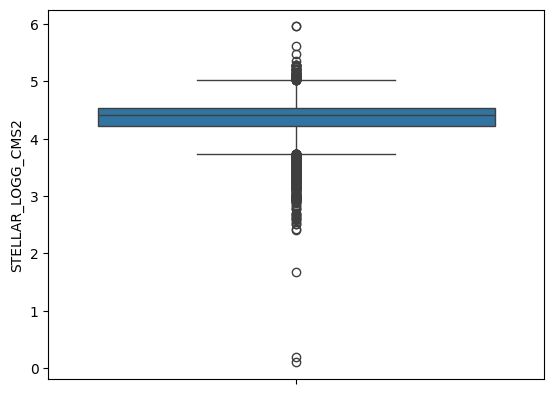

In [239]:
sns.boxplot(df['STELLAR_LOGG_CMS2'])

In [240]:
df = df[(df['STELLAR_LOGG_CMS2'] > 2) & (df['STELLAR_LOGG_CMS2'] < 5.5)]

<Axes: ylabel='STELLAR_LOGG_CMS2'>

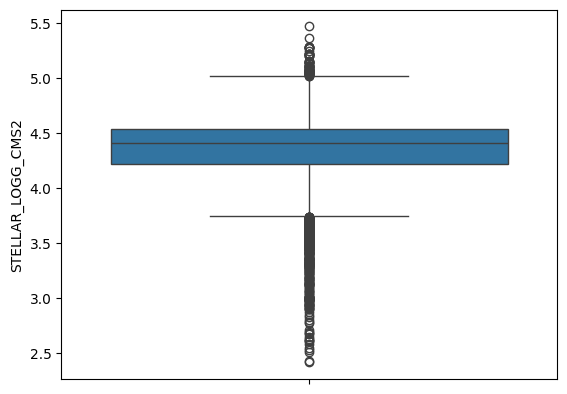

In [241]:
sns.boxplot(df['STELLAR_LOGG_CMS2'])

<Axes: >

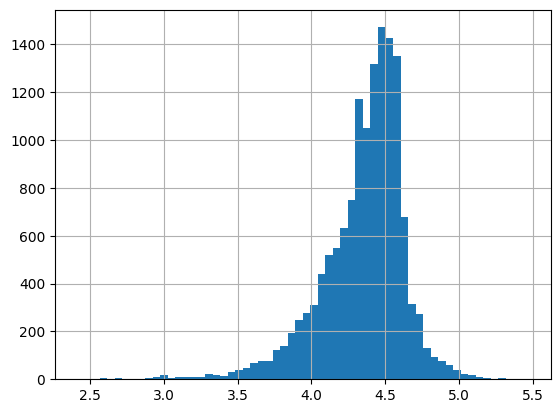

In [242]:
df['STELLAR_LOGG_CMS2'].hist(bins=60)

In [243]:
df.shape

(14185, 10)

## STELLAR_RADIUS_RSUN
- Real info: 
    - Stellar Radius range from ~0.1 to 10, typically ~0.1 to 3
        - < 0.1: Possible white dwarf or error        
        - 0.1 – 1.5: Common stars (M, K, G, F types)      
        - 1.5 – 10: Subgiants and giants                 
        - Higher then 10: Likely giants or possible data issues
        - Higher then 100: Highly suspicious; likely an error   


In [244]:
df['STELLAR_RADIUS_RSUN'].describe()

count    14185.000000
mean         1.250739
std          0.840872
min          0.109000
25%          0.830310
50%          1.040000
75%          1.442000
max         16.823000
Name: STELLAR_RADIUS_RSUN, dtype: float64

<Axes: ylabel='STELLAR_RADIUS_RSUN'>

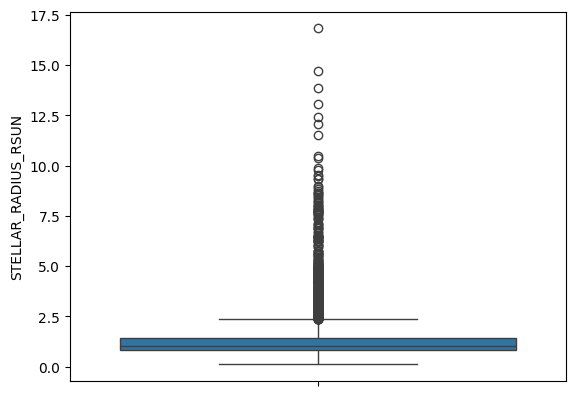

In [245]:
sns.boxplot(df['STELLAR_RADIUS_RSUN'])

<Axes: >

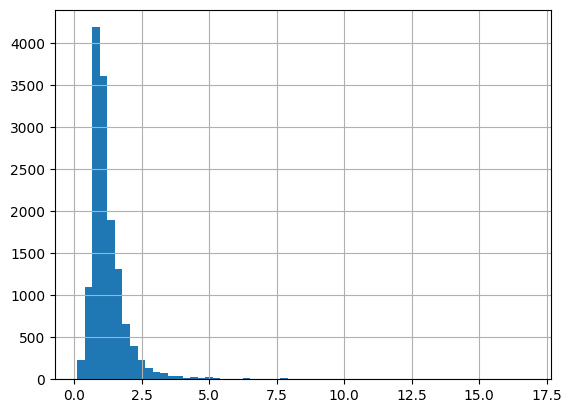

In [246]:
df['STELLAR_RADIUS_RSUN'].hist(bins=60)

In [247]:
df.shape

(14185, 10)

In [248]:
df = df.round(2)

In [249]:
df.to_csv('../data/processed/3_data_cleaning.csv', index=False, sep=';')